In [4]:
import numpy as np 

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

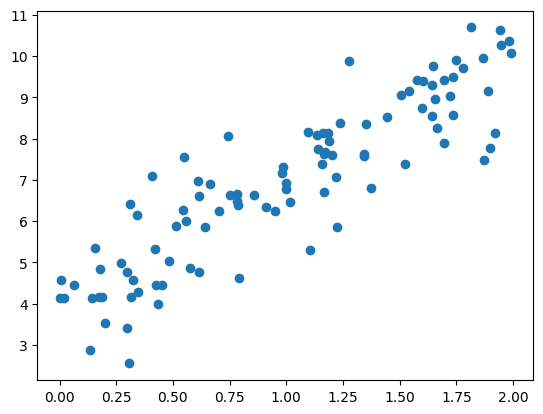

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [12]:
x_b = np.c_[np.ones((100,1)), x] 
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [14]:
theta_best

array([[3.95963166],
       [2.99433419]])

The actual function that we used to generate the data is y = 4 + 3x + Gaussian noise
From the calcuations from using the Normal Equation we see that the equation is y = 3.95 + 2.99x.
Which is very close. Lets now make predictions with it.

In [15]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[3.95963166],
       [9.94830003]])

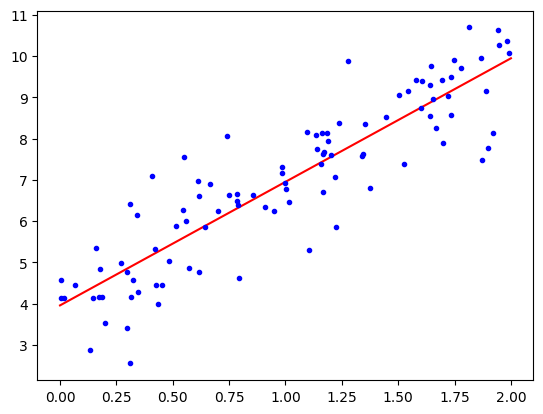

In [16]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x,y, "b.")

Finding the values we found using the normal equation but through the sklearn package

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_) 
print(lin_reg.predict(x_new))

[3.95963166] [[2.99433419]]
[[3.95963166]
 [9.94830003]]


Implimenting Batch Gradient Descent 

In [19]:
learning_rate = 0.1 
n_itterations = 1000
m = 100
theta = np.random.randn(2,1)

for itteration in range(n_itterations):
    gradients = 2/m * x_b.T.dot((x_b.dot(theta) - y))
    theta = theta - learning_rate * gradients

theta

array([[3.95963166],
       [2.99433419]])

Implimenting Shochastic Gradient Descent

In [23]:
n_echpos = 50 
t0, t1 = 5, 50 #learning schedule hyperparamters 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for echpos in range(n_echpos):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(echpos * m + 1)
        theta = theta - learning_rate * gradients

theta

array([[3.9642693 ],
       [3.01026627]])

Polynomial Regression

In [27]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.12257438]
[-2.12257438  4.50532198]


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([2.0483988]), array([[0.98380905, 0.45634257]]))

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 

def learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []
    for m in range(len(X_train)):
       model.fit(X_train[:m], y_train[:m])
       y_train_predict = model.predict(X_train[:m])
       y_val_predict = model.predict(X_test[:m])
       train_error.append(mean_absolute_error(y_train_predict[:m], y_train[:m]))
       val_error.append(mean_absolute_error(y_val_predict[:m], y_test[:m]))
    plt.plot(np.sqrt(train_error), "r-", label='train')
    plt.plot(np.sqrt(val_error), "b-", label='val') 

In [60]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

learning_curve(polynomial_regression, X, y)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by PolynomialFeatures.

In [56]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)




poly_reg = PolynomialFeatures(degree=2)
learning_curve(poly_reg, X, y)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by PolynomialFeatures.

Don't know why it is not working?

Ridge Regression

In [61]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.85938177]])

In [62]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.85644569])

In [63]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81550026])

In [64]:
lasso_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.83135221])

Elastic Net

In [65]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.8158802])

Early Stopping

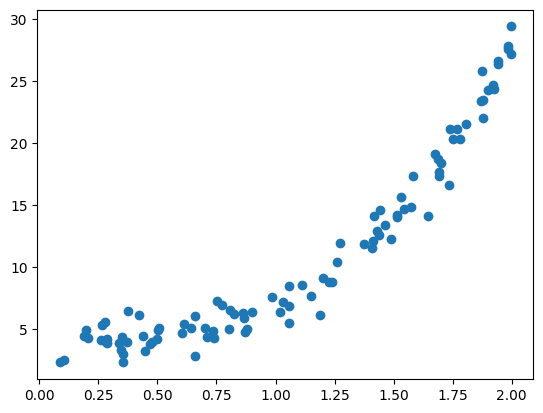

In [76]:
from sklearn.model_selection import train_test_split

x = 2 * np.random.rand(100,1)
y = 4 + 3 * (x**3) + np.random.randn(100,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(x,y)

In [83]:
from sklearn.base import clone 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=(np.infty), warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

min_val_error = float('inf')
best_epoch = None
best_model = None 

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_test, y_val_predict)
    if val_error < min_val_error:
        min_val_error = val_error 
        best_epoch = epoch
        best_model = clone(sgd_reg)


InvalidParameterError: The 'tol' parameter of SGDRegressor must be a float in the range [0, inf) or None. Got inf instead.

Don't know why it is not working ether